___
# MINIPROJETO 1

## <font color='red'>Rodrigo Lino
___

## <font color='blue'>Quantidade de filhos por mulher em 2014 por país</font>

___
### Itens 1 a 3 - Resolução:

In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import stats

print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\digol\Desktop\miniprojeto


In [4]:
dados=pd.read_excel('FM.xlsx', sep=',')
dados.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2006,2007,2008,2009,2010,2011,2012,2013,A2014,2015
0,Aruba,ABW,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,4.820,4.655,4.471,4.271,4.059,3.842,...,1.754,1.741,1.728,1.716,1.704,1.692,1.680,1.669,1.657,NaN
1,Andorra,AND,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.240,1.180,1.250,1.190,1.270,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.450,7.450,7.450,7.450,7.450,7.450,...,6.639,6.437,6.218,5.985,5.746,5.506,5.272,5.050,4.843,NaN
3,Angola,AGO,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.379,7.388,7.396,7.402,7.406,7.408,...,6.671,6.619,6.559,6.492,6.416,6.335,6.251,6.165,6.080,NaN
4,Albania,ALB,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.489,6.401,6.282,6.133,5.960,5.773,...,1.668,1.635,1.625,1.636,1.663,1.699,1.735,1.765,1.784,NaN


In [5]:
dados2014=pd.DataFrame()
dados2014["Filhos"]= dados[~dados.A2014.isnull()].A2014

In [6]:
dados2014.Filhos.describe()

count    246.000000
mean       2.772010
std        1.342611
min        1.205000
25%        1.778500
50%        2.282000
75%        3.593250
max        7.599000
Name: Filhos, dtype: float64

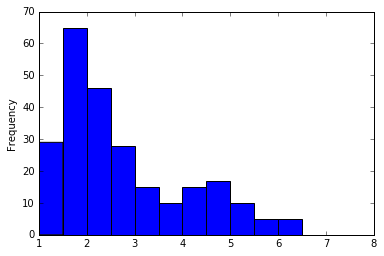

In [42]:
faixa=np.arange(1,8,0.5)
plot=dados2014.Filhos.plot.hist(bins=faixa)

___
### Itens 4 a 6 - Resolução:

O histograma mostra uma assimetria positiva, isso deve ocorrer já que a grande maioria dos países possuem piramides populacionais muito parecidas, que seguem uma tendencia de possuir mais idosos e menos jovens, principalmente nos países desinvolvídos.

Os dados usados são dados contínuos,já que são números quebrados, dois Teoremas que podem ser usados são o Lognormal e a de Weibull. Podemos ver a coerencia por gráfico.

### Lognormal

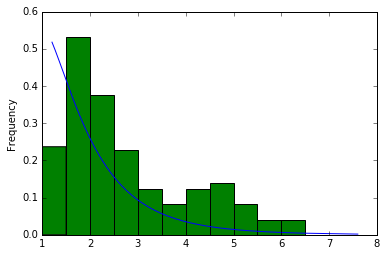

In [83]:
a=sorted(dados2014.Filhos)
plt.plot(a, stats.lognorm.pdf(a, 0.63, loc=0, scale=1.342611))
plot=dados2014.Filhos.plot.hist(bins=faixa, normed=True)

### Weibull

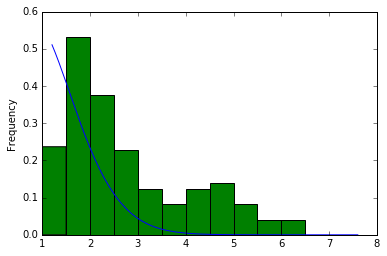

In [120]:
plt.plot(a, stats.weibull_min.pdf(a, 1.7, loc=0, scale=1.342611))
plot=dados2014.Filhos.plot.hist(bins=faixa, normed=True)

### Lognormal com fit

In [68]:
b=stats.lognorm.fit(a)
b

(0.8327986905071304, 1.0462701740424416, 1.2561400077748419)

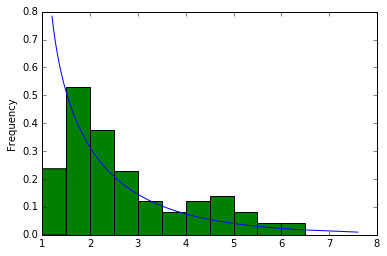

In [79]:
plt.plot(a, stats.weibull_min.pdf(a, b[0],b[1], b[2]))
plot=dados2014.Filhos.plot.hist(bins=faixa, normed=True)

### Weibull com fit

In [65]:
c=stats.weibull_min.fit(a)
c

(1.1388124808274449, 1.2031868309974043, 1.6431476579638893)

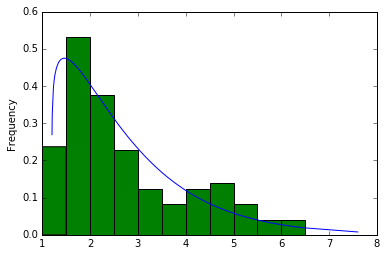

In [70]:
plt.plot(a, stats.weibull_min.pdf(a, c[0],c[1], c[2]))
plot=dados2014.Filhos.plot.hist(bins=faixa, normed=True)

### Escolha dos graficos
 
No caso do Weibull o gráfico feitp com fit ficou nitidamente melhor, porém o lognormal não está muito bom em nenhum dos casos, mas o feito com fit está um pouco melhor, já que apsar de errar muito no primeiro ele passa menos longe do hitograma.

___
### Itens 7 a 9 - Resolução:

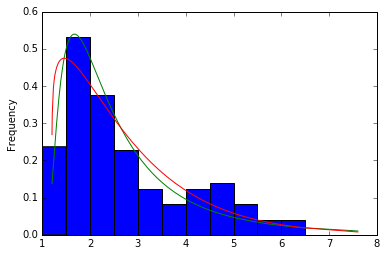

In [84]:
plot=dados2014.Filhos.plot.hist(bins=faixa, normed=True)
plt.plot(a, stats.lognorm.pdf(a, b[0],b[1], b[2]))
plt.plot(a, stats.weibull_min.pdf(a, c[0],c[1], c[2]))

## Q-Q plot

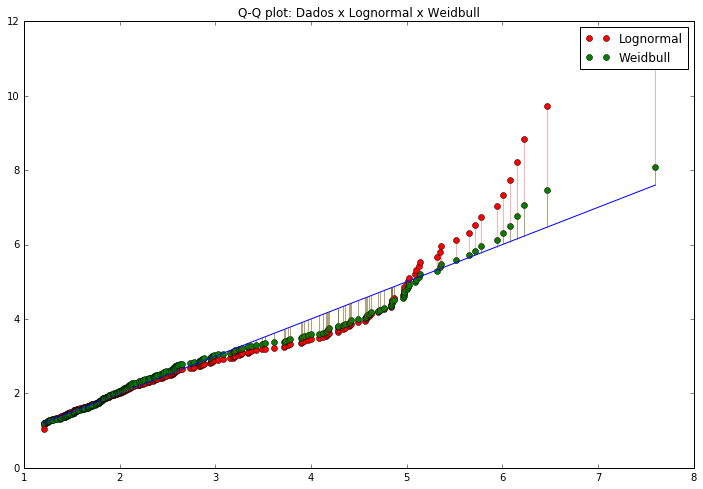

In [94]:
Filhos = pd.Series(sorted(dados2014.Filhos))
# Calcula a frequência relativa acumulada com os dados vindos dos arquivos
fra = [] # frequencia relativa acumulada
for i in range(len(Filhos)):
    acc = (i - 0.5) / len(Filhos)
    if acc < 0:
        acc = 0
    fra.append(acc) # ver Magalhães e Lima (pag. 195)

# Convertemos fra em uma Series do Pandas
fra = pd.Series(data=fra)

# Gera os valores dos quantis teóricos para as distribuições analisadas
q_log = stats.lognorm.ppf(fra,b[0], loc=b[1], scale=b[2]) # quantis teóricos da exponencial
q_weid = stats.weibull_min.ppf(fra,c[0], loc=c[1], scale=c[2])


fig = plt.figure(figsize=(12,8))

plt.title("Q-Q plot: Dados x Lognormal x Weidbull")

log_plot, = plt.plot(Filhos, q_log, 'o', color="red", label="Lognormal")
weid_plot, = plt.plot(Filhos, q_weid, 'o', color="green", label = "Weidbull")

plt.legend(handles=[log_plot, weid_plot])
plt.plot((min(Filhos), max(Filhos)), (min(Filhos), max(Filhos)), '-')


for i in range(len(Filhos)):
    plt.plot((Filhos[i], Filhos[i]), (q_log[i], Filhos[i]), '-', color='red', alpha=0.3  )
    plt.plot((Filhos[i], Filhos[i]), (q_weid[i], Filhos[i]), '-', color='green', alpha=0.3  )



Esse gráfico demontra quão distante esta os modelos teoricos com o real, com ele podemos perseber que o Weibull fica a todo momento mais próximo da reta dos dados reais.

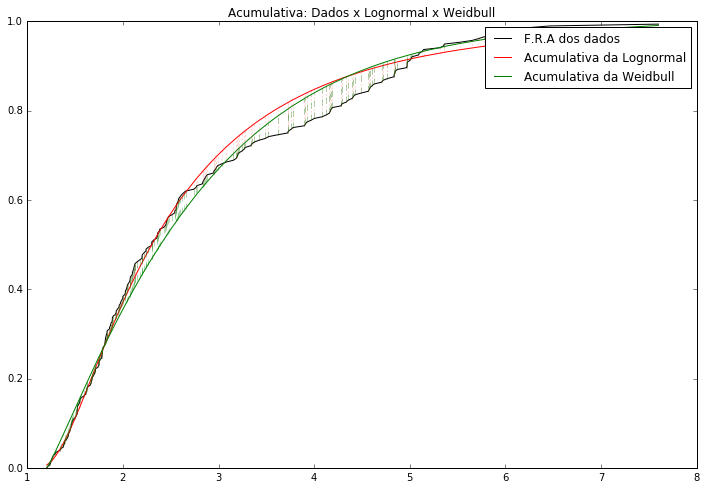

In [106]:
cdf_log = stats.lognorm.cdf(Filhos,b[0], loc=b[1], scale=b[2]) #FDA
cdf_weid = stats.weibull_min.cdf(Filhos,c[0], loc=c[1], scale=c[2])


fig = plt.figure(figsize=(12,8))

plt.title("Acumulativa: Dados x Lognormal x Weidbull")

dados_fra_plot, = plt.plot(Filhos, fra, '-', color='black', label="F.R.A dos dados")
cdf_log_plot,   = plt.plot(Filhos, cdf_log, '-', color='red', label = "Acumulativa da Lognormal")
cdf_weid_plot, = plt.plot(Filhos, cdf_weid, '-', color='green', label = "Acumulativa da Weidbull")

plt.legend(handles=[dados_fra_plot, cdf_log_plot, cdf_weid_plot])


for i in range(len(Filhos)):
    plt.plot((Filhos[i], Filhos[i]), (fra[i], cdf_log[i]), ':', color="red", alpha=0.3)
    #Omitido para não poluir muito o gráfico
    plt.plot((Filhos[i], Filhos[i]), (fra[i], cdf_weid[i]), '--', color="green", alpha=0.3)
    

Esse gráfico demonstra como as frequencias das funções acumulada das probababilidades teóricas da fução acumulada da probabilidade real, e o analisando a lognormal aparenta estar mais próxima da real.

___
### Itens 10 e 11 - Resolução:

### Calculo dos erros

In [109]:
erro_quadratico_log = sum((Filhos - q_log)**2)
erro_quadratico_weid = sum((Filhos - q_weid)**2)

print("Erro quadrático da lognormal :{:4.3f}\n".format(erro_quadratico_log))
print("Erro quadrático da weidbull :{:4.3f}\n".format(erro_quadratico_weid))


Erro quadrático da lognormal :55.200

Erro quadrático da weidbull :11.512



In [111]:
eqm_log = erro_quadratico_log/len(Filhos)
eqm_weid = erro_quadratico_weid/len(Filhos)

print("Erro quadratico médio da lognormal :", eqm_log)
print("Erro quadratico médio da weidbull :", eqm_weid)

Erro quadratico médio da lognormal : 0.22438902985
Erro quadratico médio da weidbull : 0.0467985294784


In [112]:
soma_diferenças_log = sum(abs(Filhos - q_log))
soma_diferenças_weid = sum(abs(Filhos - q_weid))

print("Soma de diferenças da lognormal :", soma_diferenças_log)
print("Soma de diferenças da weid :", soma_diferenças_weid)


Soma de diferenças da lognormal : 49.5063950358
Soma de diferenças da weid : 34.2244894518


Essas contas demosntrão que o modelo teorico Weibull está de fato mais próximo dos dados reias que a lognormal.

### Calculo dos erros nas CDFs

In [113]:
# Erro quadrático nas CDFs
erro_quad_cdf_log = sum((fra - cdf_log)**2)

erro_quad_cdf_weid = sum((fra - cdf_weid)**2)

print("Erro quadrático da CDF da Lognormal versus F.R.A", erro_quad_cdf_log)
print("Erro quadrático da CDF da Weidbull versus F.R.A", erro_quad_cdf_weid)



Erro quadrático da CDF da Lognormal versus F.R.A 0.165993356551
Erro quadrático da CDF da Weidbull versus F.R.A 0.213575122067


In [116]:
# Diferenças absolutas
soma_difs_cdf_log = sum( abs(fra - cdf_log))
soma_difs_cdf_weid = sum( abs(fra - cdf_weid))

print("Erro da soma do módulo das diferenças da lognormal versus F.R.A: {0} \nErro da soma do módulo das diferenças da weidbull versus F.R.A: {1}".format(soma_difs_cdf_log, soma_difs_cdf_weid))

Erro da soma do módulo das diferenças da lognormal versus F.R.A: 4.5617826695249235 
Erro da soma do módulo das diferenças da weidbull versus F.R.A: 6.057254019970221


Já essas contas demonstrão que apesar de no primeiro caso a weibull estar mais próxima da realidade, quando passamos a analisar os dados acumulados a função lognormal se aproxima mais dos dados exprimatais que a weibull.

|       Medidas Aderência                  |Lognormal|Weibull|
|------------------------------------------|----------|-------|
|    Erro quadrático                       |  55.2    |  11.5 |
|    Erro quadratico médio                 |   0.2    | 0.04  |
|    Soma de diferencia                    |  49.5    | 34.2  | 
|    Erro quadrático da cdf                |  0.16    | 0.21  |
| Erro da soma do módulo das diferenças cdf|    4.5   | 6.0   |

### Conclusão 
A tabela é a junção dos erros analisados acima, então como dito antes a função lognormal passa a ser melhor para analisar os dados acumulados,nesse caso, ou seja, poderiamos usar a lognormal para responder uma pergunta como: Qual a probabilidade de uma certa mulher ter até 3 filhos?